In [2]:
import numpy
import matplotlib.pyplot as plt
import linreg

In [3]:
# number of data points
n_points = 15

# maximum degree 
max_degree = 2

In [4]:
# set a seed here to initialize the random number generator
# (such that we get the same dataset each time this cell is executed)
numpy.random.seed(1)

# let's generate some "non-linear" data; note
# that the sorting step is done for visualization
# purposes only (to plot the models as connected lines)
X = numpy.random.uniform(-10,10, n_points)
t = X**2 + numpy.random.random(n_points) * 25

print(X)
print(t)
# reshape both arrays to make sure that we deal with
# N-dimensional Numpy arrays
t = t.reshape((len(t), 1))
X = X.reshape((len(X),1))
print("Shape of our data matrix: %s" % str(X.shape))
print("Shape of our target vector: %s" % str(t.shape))

[-1.65955991  4.40648987 -9.9977125  -3.95334855 -7.06488218 -8.1532281
 -6.27479577 -3.08878546 -2.06465052  0.77633468 -1.61610971  3.70439001
 -5.91095501  7.56234873 -9.45224814]
[ 19.51582684  29.84977302 113.92150102  19.1386382   54.8650975
  86.49374274  63.57960138  17.37620007  21.57084714  22.51242434
  24.97697719  15.84861062  35.91575866  61.43487877 111.29855741]
Shape of our data matrix: (15, 1)
Shape of our target vector: (15, 1)


In [5]:
# instantiate the regression model
model = linreg.LinearRegression()

# fit the model
model.fit(X,t)

# get predictions for the data points
preds = model.predict(X)

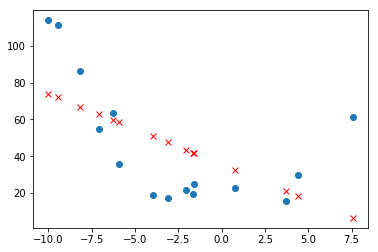

In [6]:
# plot the points and the linear regression model
plt.plot(X, t, 'o')
plt.plot(X, preds, 'x', color='red')
plt.show()

In [7]:
def augment(X, max_order):
    """ Augments a given data
    matrix by adding additional 
    columns.
    
    NOTE: In case max_order is very large, 
    numerical inaccuracies might occur
    """
    
    X_augmented = X
    
    for i in range(2, max_order+1):
        print("Augmented with order %i ..." % i)
        X_augmented = numpy.concatenate([X_augmented, X**i], axis=1)
        
    return X_augmented

Xnew = augment(X, max_degree)
print("Shape of augmented data matrix: %s" % str(Xnew.shape))

Augmented with order 2 ...
Shape of augmented data matrix: (15, 2)


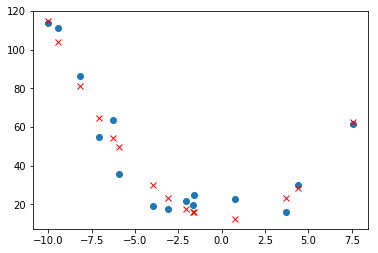

In [8]:
# fit linear regression model using the augmented data matrix
model = linreg.LinearRegression()
model.fit(Xnew,t)
preds = model.predict(Xnew)

# plot the results: only use the first column of the augmented
# data matrix, which corresponds to the original one-dimensional
# input variables
plt.plot(Xnew[:,0], t, 'o')
plt.plot(Xnew[:,0], preds, 'x', color='red')

plt.show()

Augmented with order 2 ...


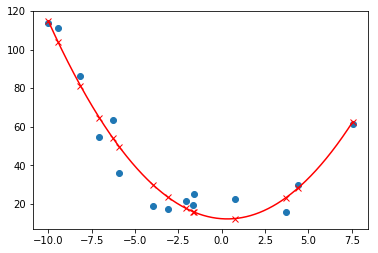

In [9]:
# same plot as before but with some more points
# for plotting the model ...
Xplot = numpy.arange(X.min(), X.max(), 0.01)
Xplot = Xplot.reshape((len(Xplot), 1))
Xplot = augment(Xplot, max_degree)
preds_plot = model.predict(Xplot)

plt.plot(Xnew[:,0], t, 'o')
plt.plot(Xnew[:,0], preds, 'x', color='red')
plt.plot(Xplot[:,0], preds_plot, '-', color='red')

plt.show()